Linear Regression using Scikit-Learn

References -

*   https://www.youtube.com/watch?v=E5RjzSK0fvY 
*   https://www.youtube.com/watch?v=NUXdtN1W1FE
*   https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Using Boston Data Set - House pricing

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [12]:
boston['target'][:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
## lets load the boston data into pandas dataframe

In [0]:
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

In [25]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
## we will check the column types, Linear Regression needs numerical values

In [26]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [0]:
## lets check for any null values

In [27]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [0]:
## above indicates , the columns are numerical and there are no - Null/NaN values

In [0]:
np.random.seed(1)
from sklearn.linear_model import LinearRegression

X = boston_df.drop('target', axis=1)
y = boston_df['target']

In [29]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [0]:
## lets split the data into train(80%) and test(20%)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [0]:
## create a regression model and fit the data

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
## lets check the score of the model, or evaluate

In [38]:
model.score(X_test, y_test)

0.7634174432138452

In [0]:
## says that model is 76.34% accurate

In [0]:
## predicting the model

In [0]:
y_preds = model.predict(X_test)

In [49]:
y_preds.shape

(102,)

In [50]:
y_test.shape

(102,)

In [0]:
## r2_score calculation

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.7634174432138452

In [0]:
## analysing the predicted and actual values

In [55]:
df = pd.DataFrame({
    'actual_values' : y_test,
    'predicted_values' : y_preds
})
df.head()


,actual_values,predicted_values
307,28.2,32.655032
343,23.9,28.093495
47,16.6,18.029018
67,22.0,21.476716
362,20.8,18.825439


In [0]:
## lets plot the first 25 values

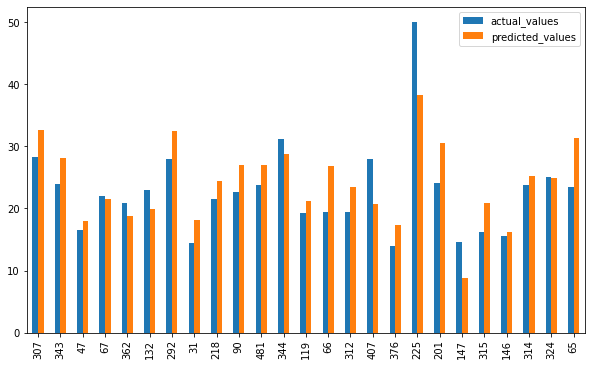

In [71]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(10,6))
plt.show()

In [75]:
X_test.size, y_test.size, X_train.size, y_train.size, y_preds.size

(1326, 102, 5252, 404, 102)

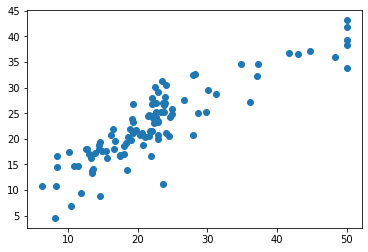

In [109]:
# ideally this should be a straight line
plt.scatter(y_test, y_preds)
plt.show()